In [1]:
import numpy as np
import matplotlib.pyplot as plt

from common import *
from chromaticity_diagram import xyDiagram, rgDiagram

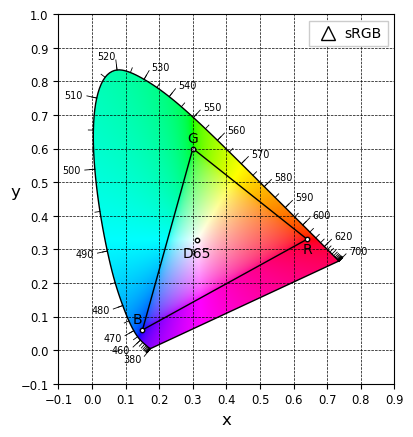

In [2]:
xy_diagram = xyDiagram()
xy_diagram.draw()
xy_diagram.save_fig('./fig/xy_chromaticity_diagram.png')

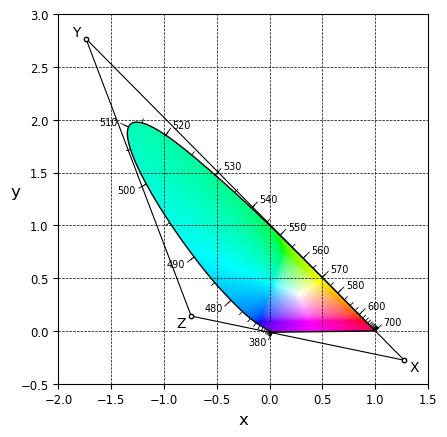

In [3]:
rg_diagram = rgDiagram()
rg_diagram.draw()
rg_diagram.save_fig('./fig/rg_chromaticity_diagram.png')

In [4]:
class TestDiagram(xyDiagram):
    info = ''
    def draw(self):
        self.set_axes()
        self.ax.set_xlim(0, 0.8)
        self.ax.set_ylim(0, 0.9)
        self.ax.set_title(self.info)
        self.add_chromaticity()

class TestDiagram1(TestDiagram):
    info = 'Y=1'
    def get_RGB(self):
        x, y = self.get_grid()
        Y = np.ones_like(y)
        xyY = np.dstack((x, y, Y))
        XYZ = xyY_to_XYZ(xyY)
        RGB = XYZ_to_sRGB(XYZ)
        RGB = RGB.clip(0, 1)
        RGB = gamma_encoding(RGB)
        
        return RGB

class TestDiagram2(TestDiagram):
    info = 'Y=0.3'
    def get_RGB(self):
        x, y = self.get_grid()
        Y = np.ones_like(y) * 0.3
        xyY = np.dstack((x, y, Y))
        XYZ = xyY_to_XYZ(xyY)
        RGB = XYZ_to_sRGB(XYZ)
        RGB = RGB.clip(0, 1)
        RGB = gamma_encoding(RGB)
        
        return RGB

class TestDiagram3(TestDiagram):
    info = 'Y=np.linspace(0, 1, N)'
    def get_RGB(self):
        x, y = self.get_grid()
        Y = np.linspace(0, 1, y.shape[0])
        Y = np.broadcast_to(Y[:, np.newaxis], y.shape)
        xyY = np.dstack((x, y, Y))
        XYZ = xyY_to_XYZ(xyY)
        RGB = XYZ_to_sRGB(XYZ)
        RGB = RGB.clip(0, 1)
        RGB = gamma_encoding(RGB)
        
        return RGB

class TestDiagram4(TestDiagram):
    info = 'Normalized by Maximum'
    def get_RGB(self):
        x, y = self.get_grid()
        Y = np.ones_like(y)
        xyY = np.dstack((x, y, Y))
        XYZ = xyY_to_XYZ(xyY)
        RGB = XYZ_to_sRGB(XYZ)
        RGB = RGB.clip(0, None)
        RGB = normalize_by_maximum(RGB)
        RGB = gamma_encoding(RGB)
        
        return RGB

class TestDiagram5(TestDiagram):
    info = 'Move toward White'
    def get_RGB(self):
        x, y = self.get_grid()
        Y = np.ones_like(y)
        xyY = np.dstack((x, y, Y))
        XYZ = xyY_to_XYZ(xyY)
        RGB = XYZ_to_sRGB(XYZ)
        RGB = move_toward_white(RGB)
        RGB = normalize_by_maximum(RGB)
        RGB = gamma_encoding(RGB)
        
        return RGB

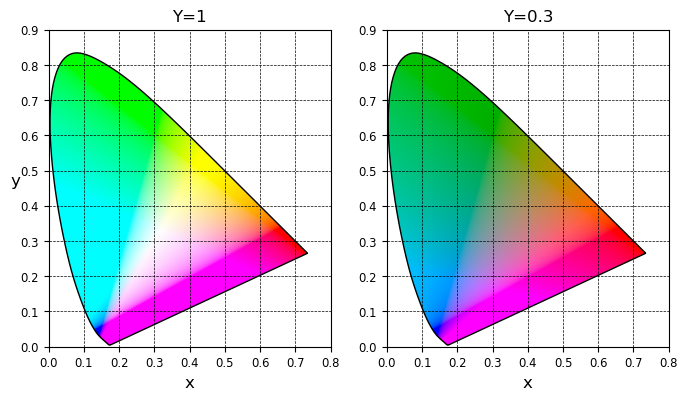

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
TestDiagram1(axes[0]).draw()
TestDiagram2(axes[1]).draw()
axes[1].set_ylabel('')
fig.savefig('./fig/test_Y1.png', dpi=300, bbox_inches='tight')

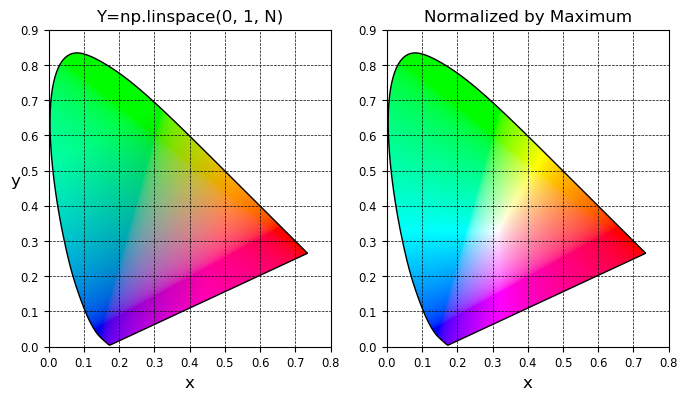

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
TestDiagram3(axes[0]).draw()
TestDiagram4(axes[1]).draw()
axes[1].set_ylabel('')
fig.savefig('./fig/test_Y2.png', dpi=300, bbox_inches='tight')

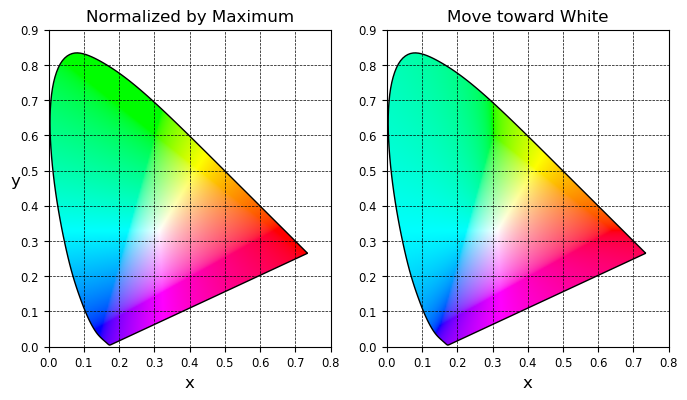

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
TestDiagram4(axes[0]).draw()
TestDiagram5(axes[1]).draw()
axes[1].set_ylabel('')
fig.savefig('./fig/test_Y3.png', dpi=300, bbox_inches='tight')

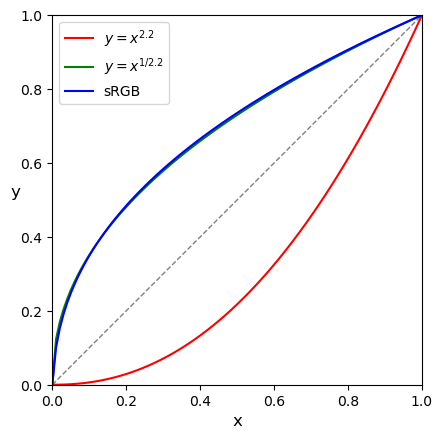

In [9]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

x = np.linspace(0, 1, 100)
y1 = x**2.2
y2 = x**(1 / 2.2)
y3 = gamma_encoding(x)

ax.plot(x, x, ls='--', lw=1, c='gray')
ax.plot(x, y1, c='r', label='$y=x^{2.2}$')
ax.plot(x, y2, c='g', label='$y=x^{1/2.2}$')
ax.plot(x, y3, c='b', label='sRGB')
ax.legend()

ax.set_xlabel('x', fontsize='large')
ax.set_ylabel('y', fontsize='large', rotation=0)
fig.savefig('./fig/gamma_curve.png', dpi=300, bbox_inches='tight')